## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
import random
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
print(len(combined_data["Mouse ID"].unique()))

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMouse_IDs = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicateMouse_IDs

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMouse_Data = combined_data.loc[combined_data["Mouse ID"] == "g989"]
duplicateMouse_Data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanDF = combined_data[combined_data["Mouse ID"].isin(duplicateMouse_IDs) == False]
cleanDF.head()
#combined_data.groupby("Mouse ID") 
#combined_data.drop_duplicates(subset = "Mouse ID", keep = 'first', inplace = True)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
#mouse_metadata.head()
print(len(cleanDF["Mouse ID"].unique()))

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drugRegimen_df = cleanDF.groupby("Drug Regimen")

mean = drugRegimen_df.mean()["Tumor Volume (mm3)"]
median = drugRegimen_df.median()["Tumor Volume (mm3)"]
#mode = drugRegimen_df.mode()["Tumor Volume (mm3)"]
variance = drugRegimen_df.var()["Tumor Volume (mm3)"]
StD = drugRegimen_df.std()["Tumor Volume (mm3)"]
sem = drugRegimen_df.sem()["Tumor Volume (mm3)"]

summaryDF = pd.DataFrame({
            "Mean": mean,
            "Median": median,
            "Variance": variance,
            "StD": StD,
            "SEM": sem
})

#print(mean)
#print(median)
#print(mode)
#print(StD)
#print(sem)

#print(summaryDF)
summaryDF


,Mean,Median,Variance,StD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
print(summaryDF.agg(['mean']))
print(summaryDF.agg(['median']))
print(summaryDF.agg(['var']))
print(summaryDF.agg(['std']))
print(summaryDF.agg(['sem']))




           Mean     Median  Variance       StD       SEM
mean  50.975982  49.902123  47.85844  6.821103  0.502785
             Mean     Median   Variance       StD       SEM
median  53.060651  51.819532  46.192684  6.794337  0.530365
          Mean     Median    Variance       StD       SEM
var  31.598895  22.140931  256.269612  1.478889  0.010707
         Mean    Median   Variance       StD       SEM
std  5.621289  4.705415  16.008423  1.216096  0.103473
         Mean    Median  Variance       StD       SEM
sem  1.777608  1.487983  5.062308  0.384563  0.032721


## Bar and Pie Charts

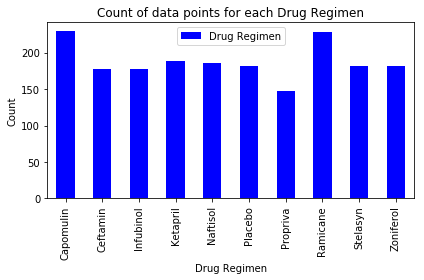

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drugRegimen_df_count = pd.DataFrame(drugRegimen_df["Drug Regimen"].count())

count_chart = drugRegimen_df_count.plot(kind='bar', title="Count of data points for each Drug Regimen", color="blue")
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Count")
plt.tight_layout()

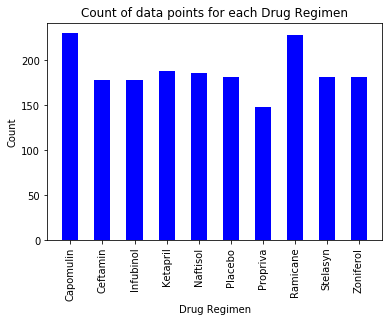

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(drugRegimen_df_count))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, drugRegimen_df_count["Drug Regimen"], color='blue', align="center", width = 0.50)
plt.xticks(tick_locations, list(drugRegimen_df_count.index), rotation="vertical")

plt.title("Count of data points for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

plt.show()

(-1.1171944866462706,
 1.1057967798535038,
 -1.110919364943666,
 1.107907705791865)

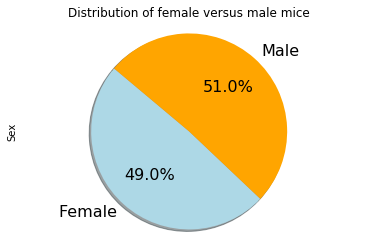

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_groupby = cleanDF.groupby("Sex")
gender_groupby_count = pd.DataFrame(gender_groupby['Sex'].count())

gender_groupby_count.plot(kind='pie', y='Sex', \
                        title="Distribution of female versus male mice",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["lightblue","orange"],legend =False)

plt.axis("equal")

(-1.1171944866462706,
 1.1057967798535038,
 -1.110919364943666,
 1.107907705791865)

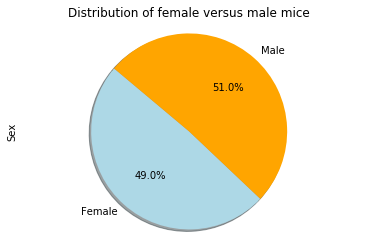

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = ["Female", "Male"]
gender_counts = gender_groupby_count['Sex']
colors = ["lightblue", "orange"]
plt.pie(gender_counts, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_drugs = cleanDF[cleanDF['Drug Regimen'].isin(four_drug_list)]

# Start by getting the last (greatest) timepoint for each mouse
sorted_df = four_drugs.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
last_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
last_df.reset_index() 
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,1764,b128,45,38.982878,2,Capomulin,Female,9,22
1,1829,b742,45,38.939633,0,Capomulin,Male,7,21
2,1777,g288,45,37.074024,1,Capomulin,Male,3,19
3,1791,g316,45,40.159220,2,Capomulin,Female,22,22
4,1878,i557,45,47.685963,1,Capomulin,Female,1,24
5,1850,i738,45,37.311846,2,Capomulin,Female,23,20
6,1859,j119,45,38.125164,1,Capomulin,Female,7,23
7,1771,l509,45,41.483008,3,Capomulin,Male,17,21
8,1817,l897,45,38.846876,1,Capomulin,Male,17,19
9,1843,m601,45,28.430964,1,Capomulin,Male,22,17


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumorVol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = last_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

for drugs in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorVol = last_df.loc[last_df["Tumor Vole (mm3)"]]
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is: {upperq}")
    print(f"The interquartile range is: {iqr}")
    print(f"The the median is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

KeyError: 0.25

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

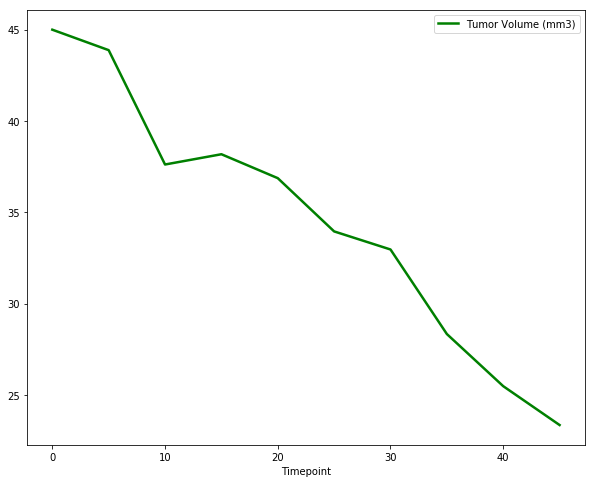

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = cleanDF.loc[cleanDF["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()

cap_single_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
cap_single_df = cap_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
cap_single_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='green')


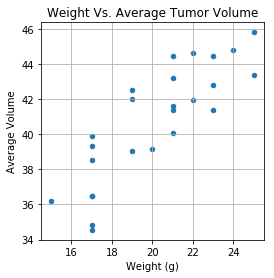

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
reduced_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
average_cap = pd.DataFrame(reduced_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_cap = average_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})

average_cap = average_cap.set_index('Mouse ID')

average_cap.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")
plt.show()

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = average_cap.iloc[:,0]
avg_tumor_volume = average_cap.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


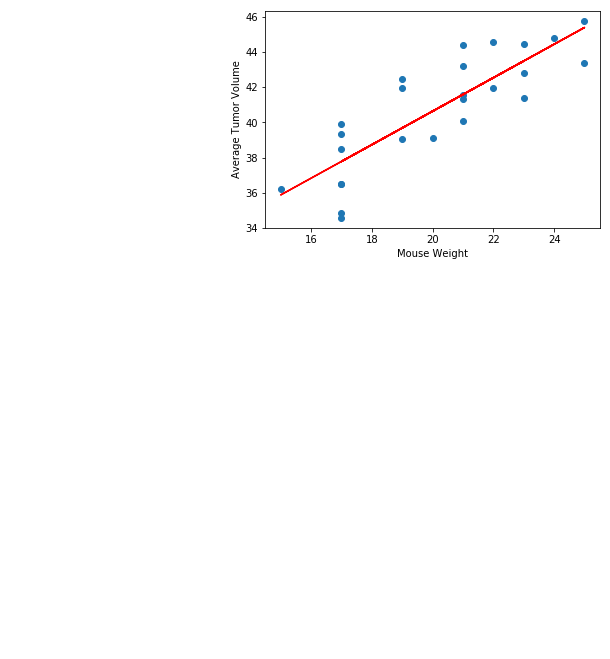

In [18]:
x_values = average_cap['Weight (g)']
y_values = average_cap['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()